In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ujjwalwadhwa/cars24com-used-cars-dataset")

print("Path to dataset files:", path)

100%|██████████| 131k/131k [00:00<00:00, 41.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ujjwalwadhwa/cars24com-used-cars-dataset/versions/3


In [ ]:
import os

# Path from kagglehub output
path = "/root/.cache/kagglehub/datasets/ujjwalwadhwa/cars24com-used-cars-dataset/versions/3"

# List all files
os.listdir(path)


['README.md', 'Cars24_Scrapper.ipynb', 'cars_24_combined.csv']

Load the Dataset in Pandas

In [ ]:
import pandas as pd

# Full path to the CSV file
file_path = "/root/.cache/kagglehub/datasets/ujjwalwadhwa/cars24com-used-cars-dataset/versions/3/cars_24_combined.csv"

# Load into a DataFrame
df = pd.read_csv(file_path)

# Preview first 5 rows
df.head()


,Unnamed: 0,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,0,Maruti S PRESSO,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000
1,1,Hyundai Xcent,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000
2,2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
3,3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000
4,4,Tata Tiago,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000


In [ ]:
# General info
df.info()

# Statistical summary for numerical columns
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8015 entries, 0 to 8014
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8015 non-null   int64  
 1   Car Name    8014 non-null   object 
 2   Year        8014 non-null   float64
 3   Distance    8015 non-null   int64  
 4   Owner       8015 non-null   int64  
 5   Fuel        8015 non-null   object 
 6   Location    7802 non-null   object 
 7   Drive       8015 non-null   object 
 8   Type        8015 non-null   object 
 9   Price       8015 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 626.3+ KB


,0
Unnamed: 0,0
Car Name,1
Year,1
Distance,0
Owner,0
Fuel,0
Location,213
Drive,0
Type,0
Price,0


Drop unnecessary column

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

Handle missing values

In [ ]:
df['Location'] = df['Location'].fillna('Unknown')
df = df.dropna(subset=['Car Name', 'Year'])


Convert data types

In [ ]:
df['Year'] = df['Year'].astype(int)

Check for duplicates

In [ ]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


Strip spaces in column names

In [ ]:
df.columns = df.columns.str.strip()

Quick overview after cleaning

In [ ]:
print("Dataset shape after cleaning:", df.shape)
print("Missing values after cleaning:\n", df.isnull().sum())
print("Column types:\n", df.dtypes)

Dataset shape after cleaning: (8014, 9)
Missing values after cleaning:
 Car Name    0
Year        0
Distance    0
Owner       0
Fuel        0
Location    0
Drive       0
Type        0
Price       0
dtype: int64
Column types:
 Car Name    object
Year         int64
Distance     int64
Owner        int64
Fuel        object
Location    object
Drive       object
Type        object
Price        int64
dtype: object


EDA (Exploratory Data Analysis)

In [ ]:
# Basic info
df.info()

# First few rows
df.head()

# Statistical summary of numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 8014 entries, 0 to 8014
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Car Name  8014 non-null   object
 1   Year      8014 non-null   int64 
 2   Distance  8014 non-null   int64 
 3   Owner     8014 non-null   int64 
 4   Fuel      8014 non-null   object
 5   Location  8014 non-null   object
 6   Drive     8014 non-null   object
 7   Type      8014 non-null   object
 8   Price     8014 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 626.1+ KB


,Year,Distance,Owner,Price
count,8014.000000,8014.000000,8014.000000,8.014000e+03
mean,2016.995009,52626.256676,1.300225,5.748328e+05
std,2.861454,29181.519800,0.510914,2.650835e+05
min,2010.000000,0.000000,1.000000,1.190000e+05
25%,2015.000000,30736.750000,1.000000,3.930000e+05
50%,2017.000000,50369.500000,1.000000,5.350000e+05
75%,2019.000000,71762.500000,2.000000,6.980000e+05
max,2023.000000,971212.000000,4.000000,3.300000e+06


Analyze Car Brands and Models

In [ ]:
df['Brand'] = df['Car Name'].apply(lambda x: x.split()[0])

In [ ]:
brand_counts = df['Brand'].value_counts().head(10)
print(brand_counts)


Brand
Maruti        3433
Hyundai       2008
Honda          829
Renault        385
Tata           350
Volkswagen     182
Ford           175
Toyota         173
Mahindra       153
Datsun         110
Name: count, dtype: int64


/tmp/ipython-input-2008254381.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")


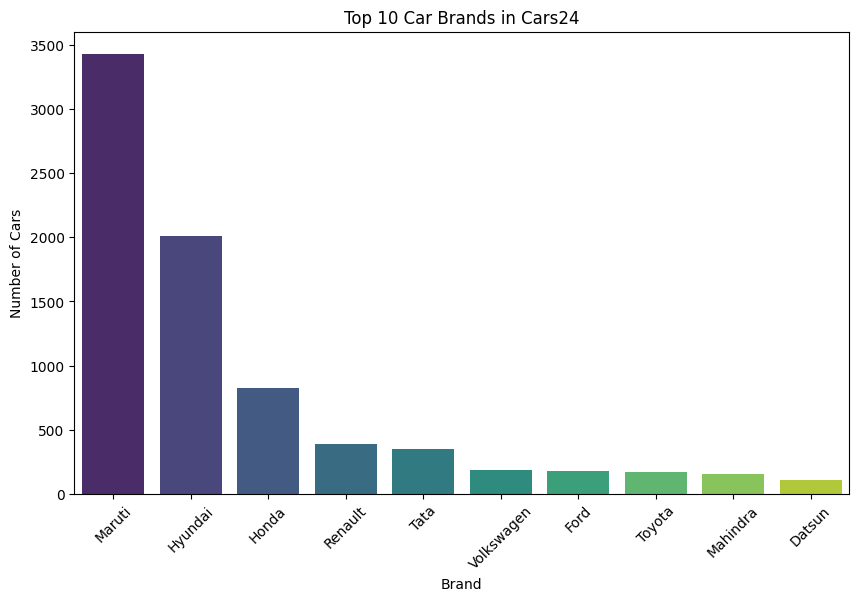

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")
plt.title("Top 10 Car Brands in Cars24")
plt.ylabel("Number of Cars")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.show()


Price Distribution

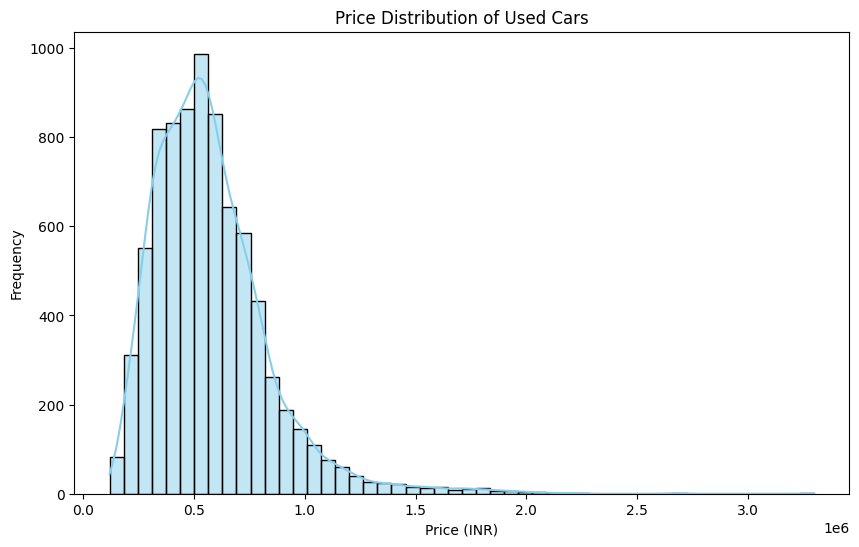

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=50, kde=True, color='skyblue')
plt.title("Price Distribution of Used Cars")
plt.xlabel("Price (INR)")
plt.ylabel("Frequency")
plt.show()


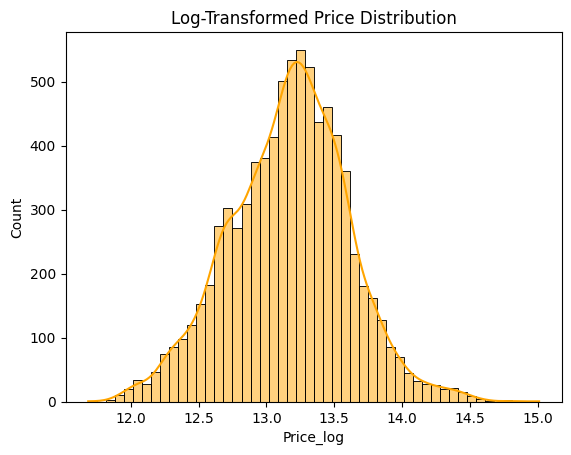

In [ ]:
import numpy as np
df['Price_log'] = np.log(df['Price'])
sns.histplot(df['Price_log'], bins=50, kde=True, color='orange')
plt.title("Log-Transformed Price Distribution")
plt.show()


Price by Car Type, Fuel, or Transmission

/tmp/ipython-input-1326751865.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Type', y='Price', data=df, palette="coolwarm", ci=None)
/tmp/ipython-input-1326751865.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Price', data=df, palette="coolwarm", ci=None)


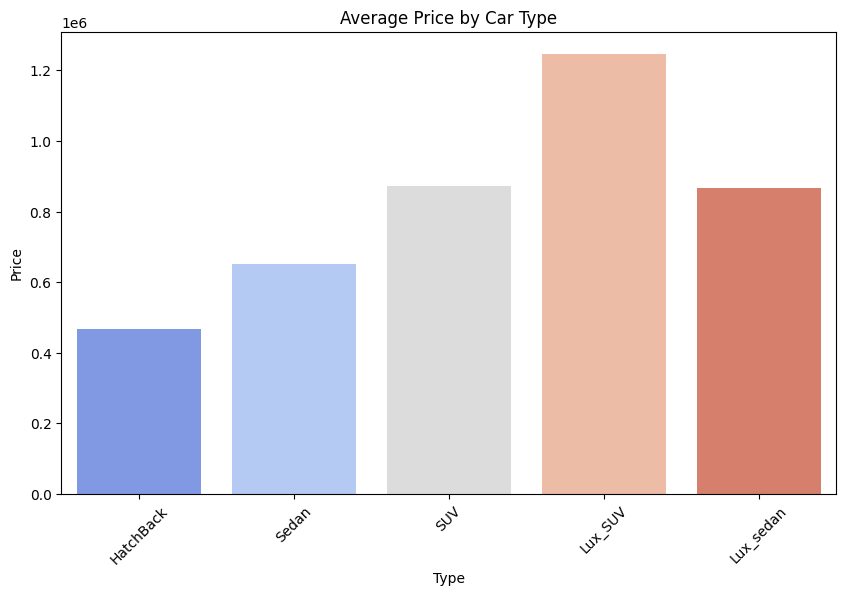

/tmp/ipython-input-1326751865.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Fuel', y='Price', data=df, palette="Set2", ci=None)
/tmp/ipython-input-1326751865.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fuel', y='Price', data=df, palette="Set2", ci=None)


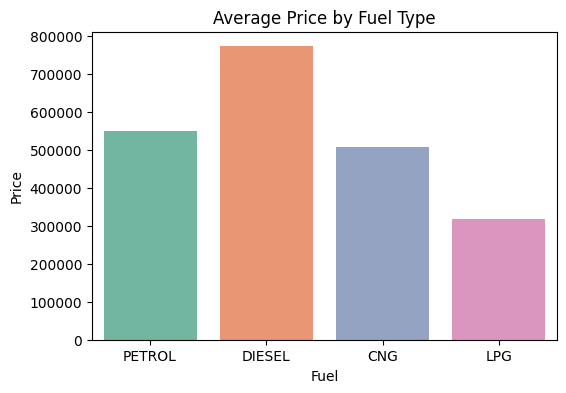

/tmp/ipython-input-1326751865.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Drive', y='Price', data=df, palette="Set3", ci=None)
/tmp/ipython-input-1326751865.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Drive', y='Price', data=df, palette="Set3", ci=None)


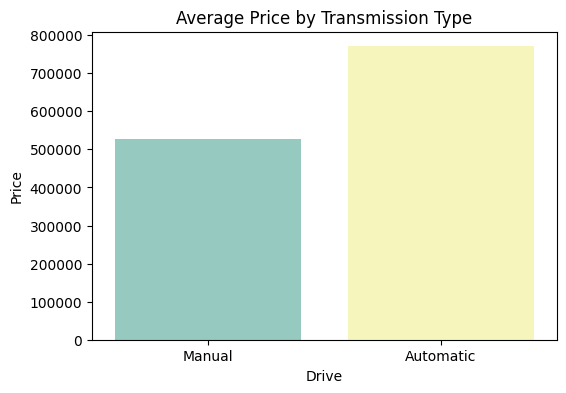

In [ ]:
# Average price by Car Type
plt.figure(figsize=(10,6))
sns.barplot(x='Type', y='Price', data=df, palette="coolwarm", ci=None)
plt.title("Average Price by Car Type")
plt.xticks(rotation=45)
plt.show()

# Average price by Fuel
plt.figure(figsize=(6,4))
sns.barplot(x='Fuel', y='Price', data=df, palette="Set2", ci=None)
plt.title("Average Price by Fuel Type")
plt.show()

# Average price by Drive
plt.figure(figsize=(6,4))
sns.barplot(x='Drive', y='Price', data=df, palette="Set3", ci=None)
plt.title("Average Price by Transmission Type")
plt.show()


**Price vs Year / Distance**

Price vs Car Age (Year)

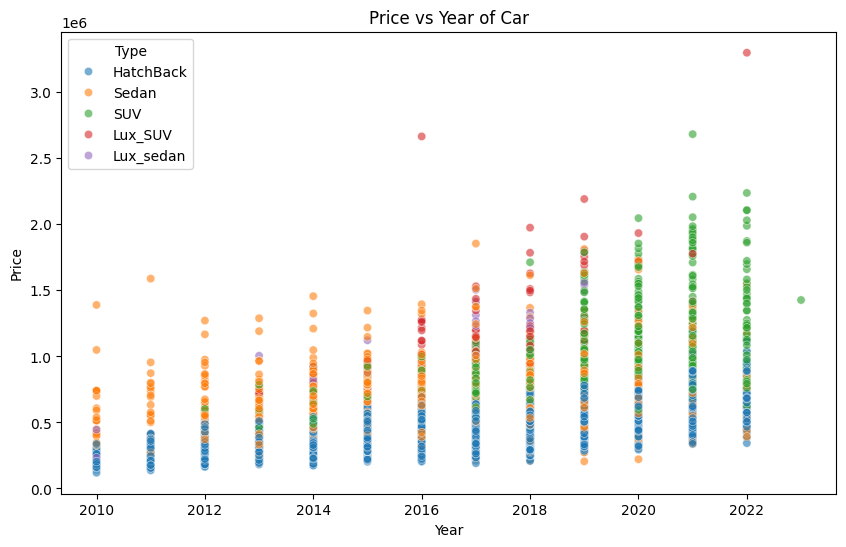

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Year', y='Price', data=df, hue='Type', alpha=0.6)
plt.title("Price vs Year of Car")
plt.show()


Price vs Distance Driven

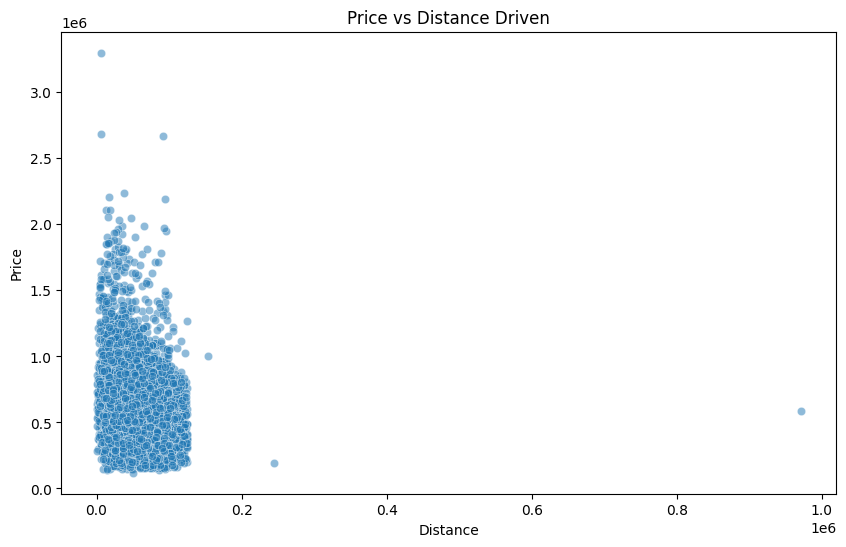

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Distance', y='Price', data=df, alpha=0.5)
plt.title("Price vs Distance Driven")
plt.show()


Location Analysis

/tmp/ipython-input-4011760913.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette="magma")


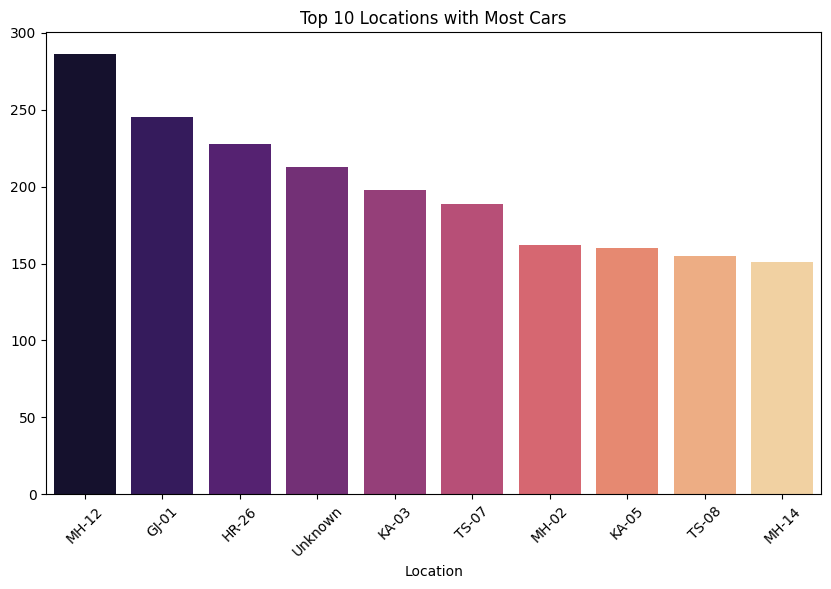

In [ ]:
# Top 10 locations
top_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.index, y=top_locations.values, palette="magma")
plt.title("Top 10 Locations with Most Cars")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-288636091.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_location.index, y=avg_price_location.values, palette="cividis")


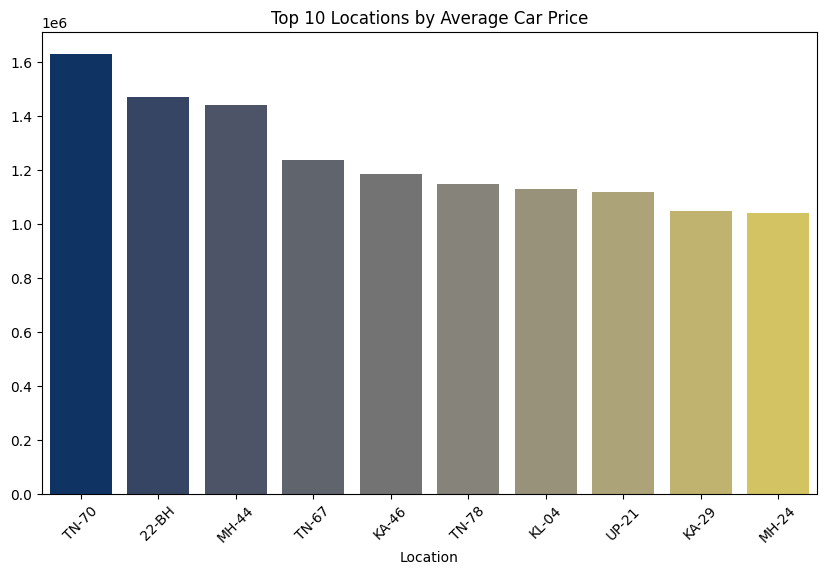

In [ ]:
avg_price_location = df.groupby('Location')['Price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_location.index, y=avg_price_location.values, palette="cividis")
plt.title("Top 10 Locations by Average Car Price")
plt.xticks(rotation=45)
plt.show()


Correlation Analysis

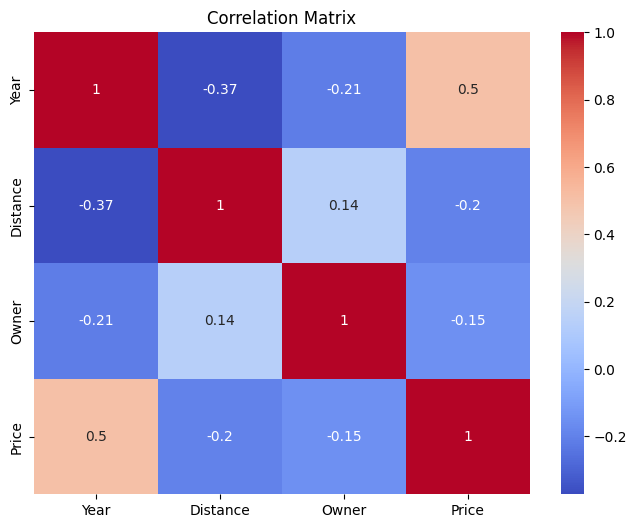

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Year','Distance','Owner','Price']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


**Feature Engineering**

Create Car Age

In [ ]:
from datetime import datetime

current_year = datetime.now().year
df['Car_Age'] = current_year - df['Year']

# Quick check
df[['Year','Car_Age']].head()


,Year,Car_Age
0,2022,3
1,2018,7
2,2021,4
3,2019,6
4,2021,4


Price per Kilometer

In [ ]:
# Avoid division by zero
df['Distance_km'] = df['Distance'].replace(0,1)
df['Price_per_km'] = df['Price'] / df['Distance_km']

# Preview
df[['Distance','Price','Price_per_km']].head()


,Distance,Price,Price_per_km
0,3878,514000,132.542548
1,32041,674000,21.035548
2,96339,1952000,20.261784
3,51718,690000,13.341583
4,19811,526000,26.550906


Encode Categorical Features

In [ ]:
# Select columns for encoding
categorical_cols = ['Brand','Fuel','Drive','Type','Location']

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check new shape
print("Shape after encoding:", df_encoded.shape)


Shape after encoding: (8014, 468)


In [ ]:
# Check first rows
df_encoded.head()

# Check column list
df_encoded.columns


Index(['Car Name', 'Year', 'Distance', 'Owner', 'Price', 'Price_log',
       'Car_Age', 'Distance_km', 'Price_per_km', 'Brand_Datsun',
       ...
       'Location_WB-26', 'Location_WB-30', 'Location_WB-32', 'Location_WB-38',
       'Location_WB-42', 'Location_WB-44', 'Location_WB-50', 'Location_WB-66',
       'Location_WB-90', 'Location_WB-98'],
      dtype='object', length=468)

**Advanced Analysis / Business Insights**

Top Brands by Average Price

/tmp/ipython-input-119318104.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands_price.index, y=top_brands_price.values, palette="rocket")


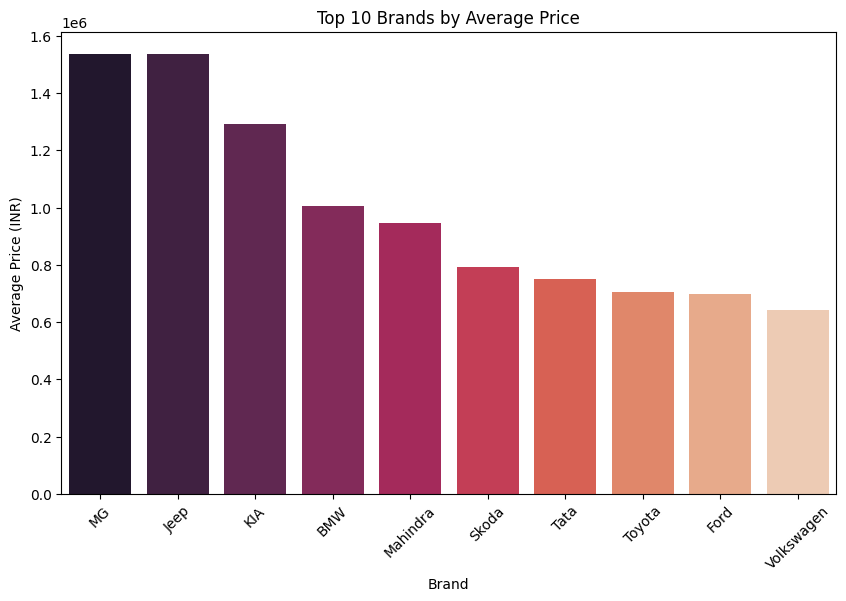

In [ ]:
top_brands_price = df.groupby('Brand')['Price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_brands_price.index, y=top_brands_price.values, palette="rocket")
plt.title("Top 10 Brands by Average Price")
plt.ylabel("Average Price (INR)")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.show()


Car Age vs Price Trend

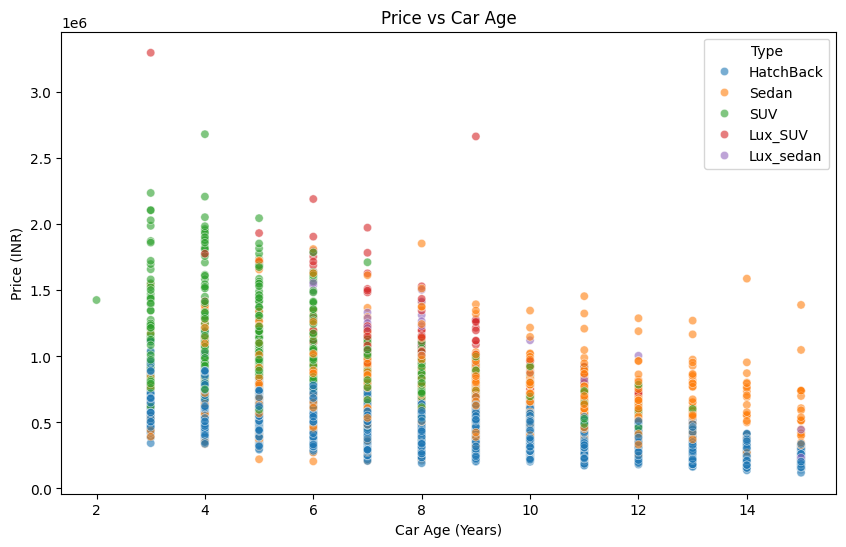

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Car_Age', y='Price', data=df, alpha=0.6, hue='Type')
plt.title("Price vs Car Age")
plt.xlabel("Car Age (Years)")
plt.ylabel("Price (INR)")
plt.show()


High-Demand but Low-Supply Cars

In [ ]:
brand_type_count = df.groupby(['Brand','Type']).size().sort_values(ascending=False)
brand_type_count.head(10)


,,0
Brand,Type,
Maruti,HatchBack,2621
Hyundai,HatchBack,1525
Maruti,Sedan,572
Honda,Sedan,524
Renault,HatchBack,285
Hyundai,Sedan,240
Maruti,SUV,240
Hyundai,SUV,218
Honda,HatchBack,199


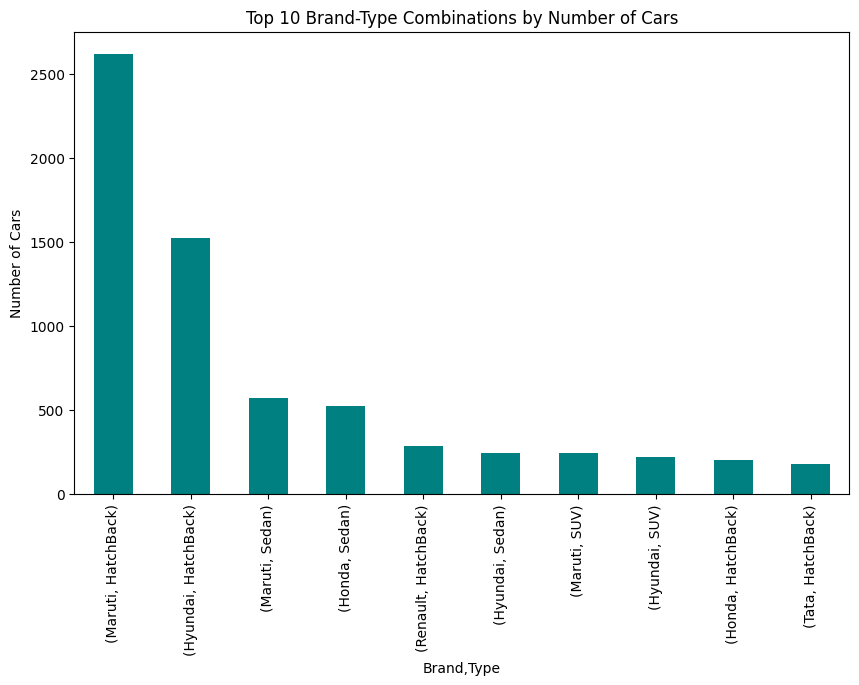

In [ ]:
top_combinations = brand_type_count.head(10)
top_combinations.plot(kind='bar', figsize=(10,6), color='teal')
plt.title("Top 10 Brand-Type Combinations by Number of Cars")
plt.ylabel("Number of Cars")
plt.show()


**Location Insights**

Average Price by Location

/tmp/ipython-input-1828347447.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_location.index, y=avg_price_location.values, palette="magma")


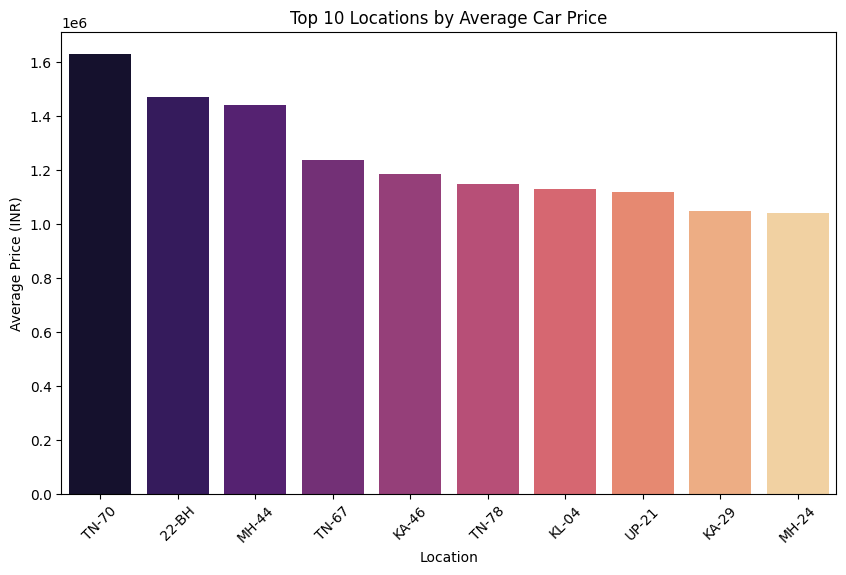

In [ ]:
avg_price_location = df.groupby('Location')['Price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_location.index, y=avg_price_location.values, palette="magma")
plt.title("Top 10 Locations by Average Car Price")
plt.ylabel("Average Price (INR)")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.show()


Correlation Heatmap (Revisited)

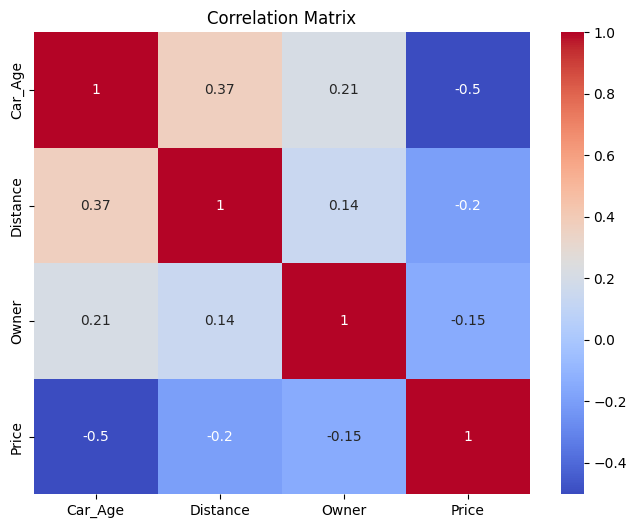

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Car_Age','Distance','Owner','Price']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Top Cars by Price per km

In [ ]:
top_value_cars = df.sort_values('Price_per_km').head(10)
top_value_cars[['Car Name','Brand','Price','Distance','Price_per_km']]


,Car Name,Brand,Price,Distance,Price_per_km
4098,Hyundai Elite i20,Hyundai,583000,971212,0.600281
2108,Maruti Alto,Maruti,192000,244253,0.786070
1422,Maruti Zen Estilo,Maruti,163000,111170,1.466223
6622,Maruti Alto,Maruti,163000,107439,1.517140
4132,Maruti Wagon R 1.0,Maruti,168000,108430,1.549387
849,Hyundai Santro Xing,Hyundai,150000,94852,1.581411
3660,Maruti Ritz,Maruti,201000,124401,1.615743
131,Hyundai i10,Hyundai,162000,99873,1.622060
5220,Hyundai i10,Hyundai,195000,120084,1.623863
2709,Maruti Ritz,Maruti,142000,86709,1.637662


**Predictive Modeling (Price Prediction)**

Select Features and Target

In [ ]:
# Target variable
y = df_encoded['Price']

# Features (exclude target, original 'Car Name', 'Price_log')
X = df_encoded.drop(columns=['Price', 'Car Name', 'Price_log'])


Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (6411, 465)
Test set shape: (1603, 465)


Train a Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate
rmse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression R²: {r2_lr:.2f}")

Linear Regression RMSE: 29967127087.05
Linear Regression R²: 0.59


Train a Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rmse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.2f}")

Random Forest RMSE: 5169615755.97
Random Forest R²: 0.93


Feature Importance (Random Forest)

/tmp/ipython-input-643499245.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance, palette='viridis')


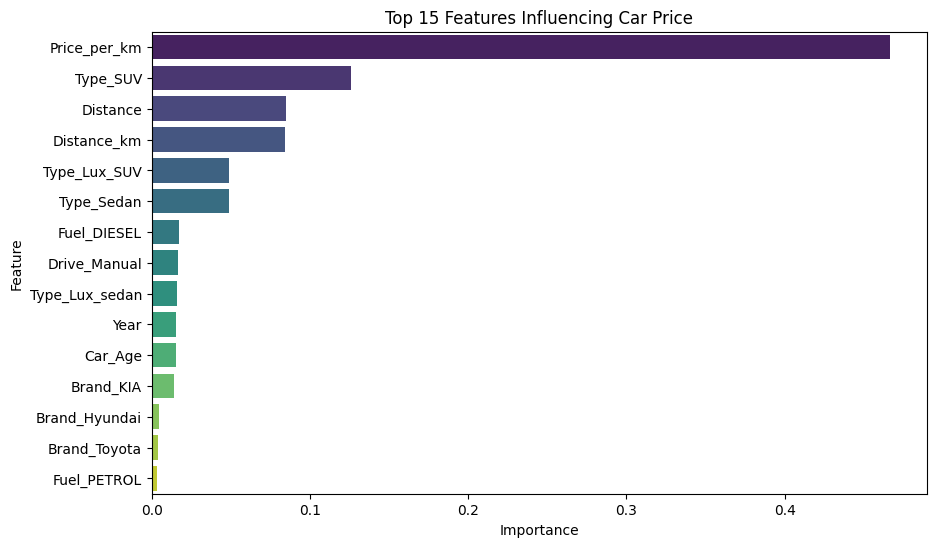

In [ ]:
importances = rf_model.feature_importances_
feature_names = X.columns

feat_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importance, palette='viridis')
plt.title("Top 15 Features Influencing Car Price")
plt.show()


Compare Actual vs Predicted

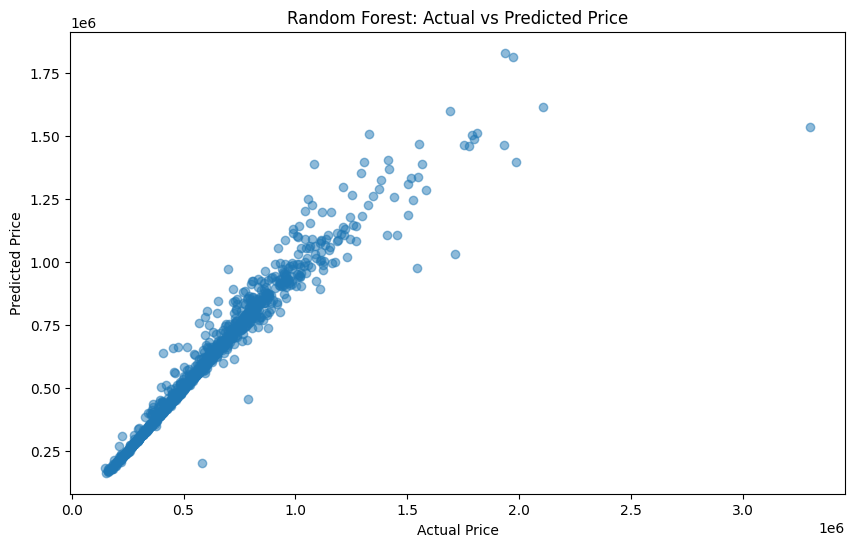

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted Price")
plt.show()


In [ ]:
df.to_csv('/content/cars24_cleaned.csv', index=False)

In [ ]:
df_encoded.to_csv('/content/cars24_encoded.csv', index=False)


In [ ]:
import joblib

# Linear Regression
joblib.dump(lr_model, '/content/lr_model.pkl')

# Random Forest
joblib.dump(rf_model, '/content/rf_model.pkl')


['/content/rf_model.pkl']

/tmp/ipython-input-3746422377.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")


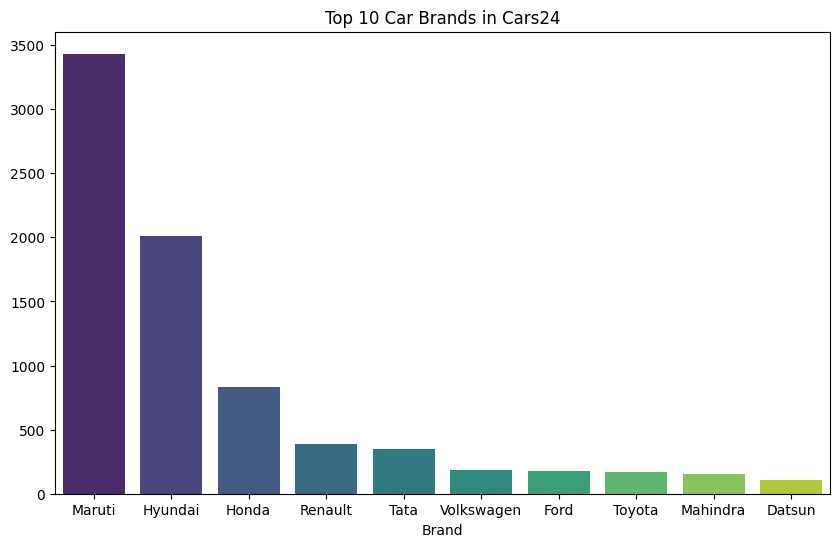

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")
plt.title("Top 10 Car Brands in Cars24")
plt.savefig('/content/top10_brands.png', dpi=300, bbox_inches='tight')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Example: save cleaned CSV to Drive
df.to_csv('/content/drive/MyDrive/cars24_cleaned.csv', index=False)
df_encoded.to_csv('/content/drive/MyDrive/cars24_encoded.csv', index=False)


Mounted at /content/drive
